In [57]:
import numpy as np
import pandas as pd

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from scipy.linalg import eigh as largest_eig

import matplotlib.pyplot as plt
%matplotlib inline

## Formatting

In [58]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = "\\usepackage{subdepth} \\usepackage{type1cm}"

## Cleaning

In [64]:
sample_df = pd.read_csv("data/sample_auxiliary.csv", header = 0, index_col = 0)
matrix_df = pd.read_csv("data/series_matrix.csv", index_col = 0)

In [69]:
mdf = pd.concat((sample_df[["cancer", "age", "packyears"]], matrix_df), axis = 1)

mdf = mdf.dropna()
mdf.head()

cancer   age  packyears  1007_s_at   1053_at    117_at    121_at  \
geoid                                                                        
GSM93997       0  34.0       17.0  10.696879  4.236170  5.345251  7.919187   
GSM94019       1  63.0       75.0  10.560653  4.173343  5.788414  8.180133   
GSM94021       1  69.0       70.0  10.299866  4.359738  5.583276  8.213886   
GSM94022       1  61.0       80.0  10.467122  4.245888  5.785865  8.184135   
GSM94023       1  49.0       20.0  10.234799  4.537967  5.881467  8.022470   

          1255_g_at   1294_at   1316_at    ...     90265_at  90610_at  \
geoid                                      ...                          
GSM93997   3.478706  7.142456  4.814028    ...     8.113917  7.373103   
GSM94019   3.745022  7.667475  5.254227    ...     8.353391  7.714989   
GSM94021   3.653105  7.509800  5.103016    ...     8.221291  7.253566   
GSM94022   3.718874  7.588953  5.233377    ...     8.297687  7.898104   
GSM94023   3.578695  7.692626  4.957821    ...     8.242604  8.189139   

          91580_at  91617_at  91682_at  91684_g_at  91703_at  91816_f_at  \
geoid                                                                      
GSM93997  3.232875  5.466897  5.952681    5.102564  5.499590    5.209175   
GSM94019  3.491614  5.597842  6.394273    5.452602  5.669695    4.375323   
GSM94021  3.333656  5.259695  6.299795    5.622406  5.984586    4.613341   
GSM94022  3.511188  5.409353  6.276960    5.445675  5.611665    4.369342   
GSM94023  3.289676  5.617069  6.064206    5.924520  6.020903    4.530274   

          91826_at  91920_at  
geoid                         
GSM93997  7.569331  6.747730  
GSM94019  8.200798  7.133049  
GSM94021  7.427216  7.121853  
GSM94022  8.122028  7.201006  
GSM94023  8.119425  7.013346  

[5 rows x 22217 columns]

In [70]:
train_df, test_df = sklearn.model_selection.train_test_split(mdf, test_size = 0.4, random_state = 12345)

## PCA

### Functions

In [32]:
pca = PCA(2)

In [33]:
ev = pca.fit(x, scale = True)

In [54]:
ev[1].T.dot(x.T)

array([[ 1.37216040e+00, -1.76363333e+00,  1.16466150e+00,
         3.13243981e+00, -9.33072320e-01,  2.87844330e+00,
        -2.64865174e-01,  1.10458160e+00,  1.16448828e+00,
        -2.03767747e+00, -1.60664699e+00,  9.82091417e-01,
         1.95305299e+00, -1.50429432e+00,  8.02082966e-01,
         6.85345582e-01, -2.93114541e+00, -2.40061739e+00,
        -1.72095825e+00, -2.30788142e+00,  1.15586501e+00,
        -1.66971610e+00,  3.67117481e-01, -1.97089102e+00,
         1.45722648e+00, -2.50256832e-01, -2.58918726e+00,
        -2.25162688e+00, -8.87213279e-01,  6.06310033e-01,
         1.30797943e+00,  4.32234192e-01,  5.65129217e-01,
         2.22102419e+00, -2.40010801e+00, -6.91539904e-02,
         1.17397581e+00, -2.05033900e+00, -1.09713454e+00,
         2.70261115e+00,  1.90905772e+00,  2.65391798e-01,
        -8.85994525e-01, -1.28945735e+00,  2.78381438e+00,
        -2.43476905e+00, -1.15134299e+00, -6.52166011e-01,
        -6.56829324e-01,  9.70233800e-01,  2.66154002e+0

In [51]:
x.T.shape

(9, 97)

### Analysis

In [7]:
x = train_df.iloc[:,1:10].values
y = train_df.iloc[:,0].values

In [17]:
x = StandardScaler().fit_transform(x)

In [18]:
x

array([[ 9.06132083e-01,  2.43041266e-01,  2.40902715e-01,
         4.91599697e-01, -1.77690544e+00,  6.60621992e-01,
         6.87663353e-01,  2.79839058e+00, -1.72160141e-01],
       [ 9.74109509e-01,  5.25632333e-01, -6.91510702e-01,
        -3.37126778e-01,  5.17582212e-01, -9.10221901e-01,
        -1.27865309e+00,  8.50649955e-01, -1.72616063e+00],
       [-2.22082952e+00, -1.34260861e+00,  1.61986575e+00,
         3.70454324e-01,  7.39204303e-01, -7.73755437e-01,
        -6.35957229e-02, -8.34478262e-01,  1.60562723e+00],
       [-1.33712298e+00, -1.20131308e+00,  1.99619771e+00,
        -5.58063971e-01, -3.64487311e-01,  4.64165520e-01,
         2.25387773e-01,  5.55146386e-01,  3.04598044e+00],
       [ 1.58590635e+00,  4.31435310e-01, -4.22161464e-01,
         4.28802319e-01,  8.08938390e-01, -6.65132753e-01,
         8.69117428e-01,  2.69784657e-02, -5.38797029e-01],
       [ 1.58380395e-01,  1.33144740e-01,  1.17347468e+00,
        -9.78762782e-01, -6.13154131e-01,  1.895367

In [55]:
pca = PCA(n_components = 2)
pca_fit = pca.fit_transform(x)

TypeError: __init__() got an unexpected keyword argument 'n_components'

In [56]:
pca_df = pd.DataFrame(data = pca_fit, columns = ['pc1', 'pc2'], index = train_df.index)
pca_df = pd.concat([pca_df, train_df["cancer"]], axis = 1)

pca_df.head()

NameError: name 'pca_fit' is not defined

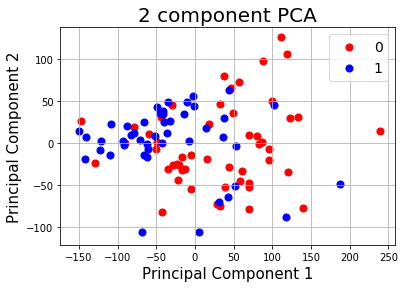

In [77]:
fig = plt.figure()


ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

colors = ['r', 'b']
targets = [0, 1]

for target, color in zip(targets,colors):
    indicesToKeep = pca_df['cancer'] == target
    ax.scatter(pca_df.loc[indicesToKeep, 'pc1']
               , pca_df.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [78]:
pca.explained_variance_ratio_

array([0.27563771, 0.08977308])